In [1]:
# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------------------------------------------
# Default theme configurations
# ----------------------------------------------------------------
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
matplotlib.rcParams.update({'errorbar.capsize': 6})

# Set default theme for seaborn plots
sns.set_style("whitegrid")
DEFAULT_PALETTE = sns.color_palette("tab10", n_colors=1)

# ----------------------------------------------------------------
# Visualizations
# ----------------------------------------------------------------
def barplot(values, stds, palette=DEFAULT_PALETTE, **kwargs):
    default_args = {"ecolor": "black", "alpha": 0.9}
    if kwargs:
        default_args.update(kwargs)
        
    n = len(values)
    index = np.arange(n)
    
    return sns.barplot(x=index, y=values, yerr=stds, palette=palette, **default_args)


def barplot_2col(values, stds, titles, palette=DEFAULT_PALETTE, figsize=(10, 5), **kwargs):
    n = len(values)
    
    fig, axes = plt.subplots(1, n, sharey=True, figsize=figsize)
    
    for i in range(n):
        barplot(values[i], stds[i], ax=axes[i], palette=DEFAULT_PALETTE, **kwargs)
        axes[i].set_title(titles[i])
    
    plt.show()
    
    
def plot_counts_vs_probs(counts, probs, palette=DEFAULT_PALETTE, figsize=(10, 5), **kwargs):
    raise NotImplemented

In [2]:
import numpy as np

from sampling.importance_sampler import ImportanceSampler

In [3]:
model_name = "EleutherAI/gpt-neo-125M"
sampler = ImportanceSampler(model_name)
model_prob_occur, samples = sampler.batch_estimate_marginals("Hello, my name is", ". . , ? !", num_sequences=512, max_num_tokens=15, seed=12873)

Using pad_token, but it is not set yet.


Importing classes for model EleutherAI/gpt-neo-125M
 -> <class 'transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer'>
 -> <class 'transformers.models.gpt_neo.modeling_gpt_neo.GPTNeoForCausalLM'>
Vocabulary size: 50257


0it [00:00, ?it/s]
  0%|                                                                                                                                                    | 0/15 [00:00<?, ?it/s]/home/kat/Projects/PhD/constrained-decoding/src/sampling/importance_sampler.py:213: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  model_prob = torch.gather(F.softmax(logits), dim=-1, index=next_tokens)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 26.17it/s]
1it [00:00,  1.74it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 90.51it/s]
2it [00:00,  2.98it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [7]:
model_prob_occur # WRONG: each of the sub

[tensor([[0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003],
         [0.0003]], device='cuda:0', grad_fn=<UnsqueezeBackward0>),
 tensor([[3.9762e-05],
         [1.3373e-04],
         [2.3518e-05],
         [7.2282e-07],
         [2.9352e-05],
         [8.3682e-05],
         [3.6628e-08],
         [1.5307e-06],
         [3.1968e-04],
         [1.7115e-04],
         [1.4326e-04],
         [4.1939e-08],
         [3.7198e-04],
         [1.0994e-07],
         [1.3962e-04]

<AxesSubplot: >

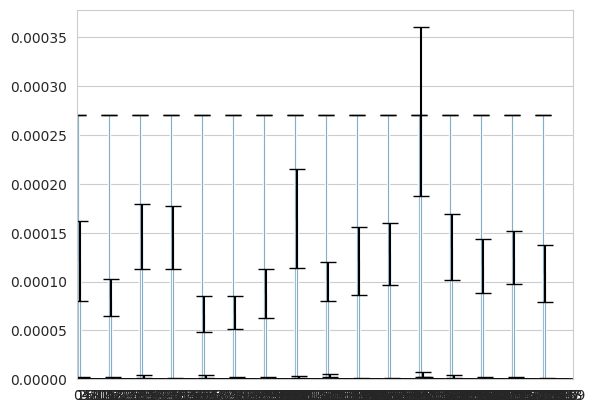

In [6]:
mean, std = sampler.compute_confidence_intervals(model_prob_occur)
mean = np.array(mean)
std = np.array(std)

barplot(mean, std)

In [ ]:
512/32

In [ ]:
mean.sum()